<a href="https://colab.research.google.com/github/ritwiks9635/CNN_Project_File/blob/main/Garbage_Classification_ipynb_txt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
https://www.kaggle.com/datasets/ asdasdasasdas/garbage-classification

In [ ]:
! unzip /content/https:/www.kaggle.com/datasets/asdasdasasdas/garbage-classification/garbage-classification.zip

# Garbage🧴📦🗞📃📜🗄🗳Classification🗑🚮🗑🚮🗑🚮🗑🚮

In [9]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [42]:
data = pd.read_csv("/content/one-indexed-files-notrash_train.txt")
data.head()

,cardboard202.jpg 3
0,paper472.jpg 2
1,paper522.jpg 2
2,glass189.jpg 1
3,glass325.jpg 1
4,metal63.jpg 5


In [11]:
data.shape

(1767, 1)

In [43]:
train_dir = "/content/Garbage classification/Garbage classification"

In [44]:
val_dir = "/content/garbage classification/Garbage classification"

In [45]:
Classes = os.listdir(train_dir)
Classes

['cardboard', 'paper', 'glass', 'plastic', 'metal', 'trash']

In [46]:
for cls in Classes:
  path1 = os.path.join(train_dir, cls)
  print(len(os.listdir(path1)))

403
594
501
482
410
137


In [47]:
data_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255.,
    zoom_range = 0.2,
    shear_range = 0.2,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    horizontal_flip = True,
    vertical_flip = True,
    validation_split = 0.2)

In [48]:
train_data = data_gen.flow_from_directory(
    train_dir,
    target_size = (300, 300),
    batch_size = 32,
    subset="training",
    class_mode = "categorical",
    shuffle = True)


val_data = data_gen.flow_from_directory(
    train_dir,
    target_size = (300, 300),
    batch_size = 32,
    subset="validation",
    class_mode = "categorical",
    shuffle = True)

Found 2024 images belonging to 6 classes.
Found 503 images belonging to 6 classes.


In [49]:
labels = train_data.class_indices
classes = list(labels.keys())

In [50]:
x, y = next(train_data)

In [51]:
def plot_img(image, labels):
  plt.figure(figsize=(15,10))
  for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(image[i])
    plt.title(classes[np.argmax(labels[i])])
    plt.axis("off")

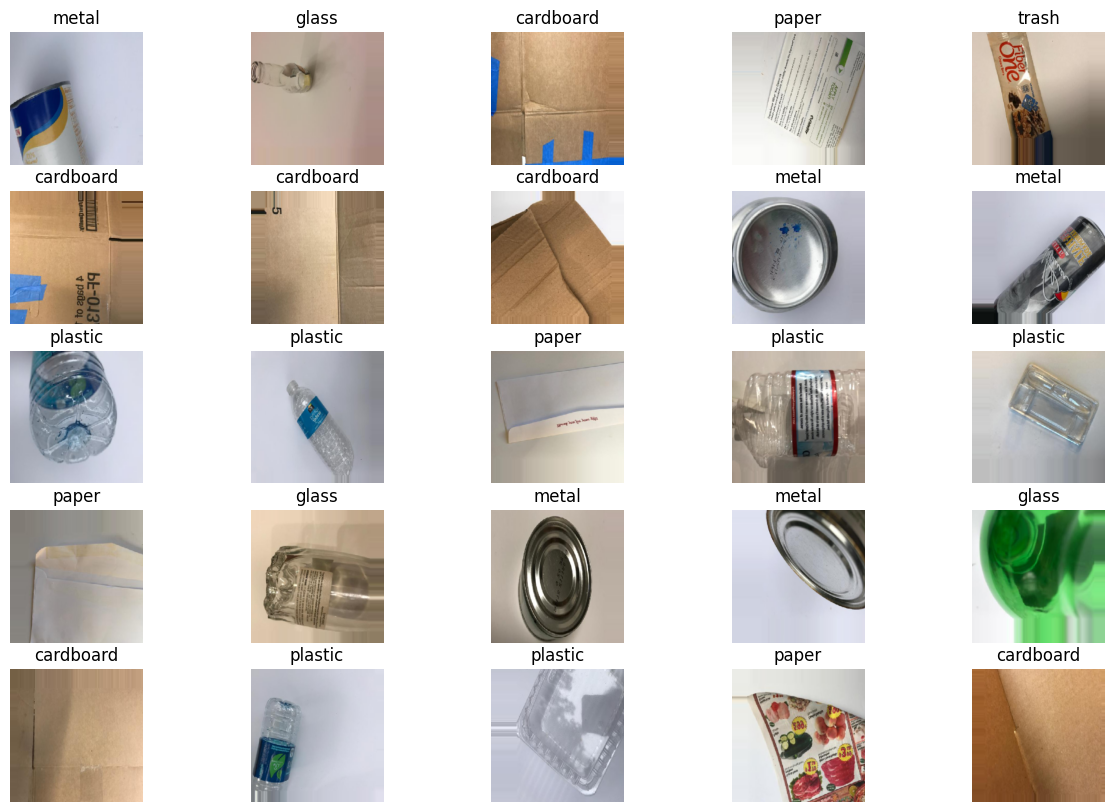

In [52]:
plot_img(x,y)

***Download Weights***

In [22]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2023-08-09 16:10:45--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.171.128, 142.250.159.128, 142.251.120.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.171.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   149MB/s    in 0.6s    

2023-08-09 16:10:46 (149 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [23]:
base_model = tf.keras.applications.InceptionV3(input_shape = (300, 300, 3), include_top = False, weights = None)
weights = "/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"
base_model.load_weights(weights)

In [24]:
for layer in base_model.layers:
    layer.trainable = False

In [25]:
base_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                      

In [26]:
last_layer = base_model.get_layer("mixed7")
print(last_layer.output_shape)
last_output = last_layer.output

(None, 17, 17, 768)


In [27]:
x = tf.keras.layers.Flatten()(last_output)
x = tf.keras.layers.Dense(1024, activation = "relu", kernel_initializer='he_normal')(x)
x = tf.keras.layers.Dropout(0.2)(x)
output = tf.keras.layers.Dense(len(Classes))(x)
model = tf.keras.Model(inputs = base_model.input, outputs = output)

In [28]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
    loss = tf.keras.losses.CategoricalCrossentropy(from_logits = True),
    metrics = ["accuracy"])

In [29]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [30]:
e_s = EarlyStopping(patience = 3, restore_best_weights = True)
m_c = ModelCheckpoint("base_model.h5", save_best_only = True)

In [32]:
history = model.fit(train_data, validation_data = val_data, epochs = 50, callbacks = [e_s, m_c])

Epoch 1/50
64/64 [==============================] - 69s 1s/step - loss: 0.3495 - accuracy: 0.8651 - val_loss: 0.5883 - val_accuracy: 0.7873
Epoch 2/50
64/64 [==============================] - 89s 1s/step - loss: 0.3356 - accuracy: 0.8760 - val_loss: 0.5417 - val_accuracy: 0.8111
Epoch 3/50
64/64 [==============================] - 119s 2s/step - loss: 0.3241 - accuracy: 0.8908 - val_loss: 0.5002 - val_accuracy: 0.8231
Epoch 4/50
64/64 [==============================] - 57s 887ms/step - loss: 0.2823 - accuracy: 0.8953 - val_loss: 0.5921 - val_accuracy: 0.7714
Epoch 5/50
64/64 [==============================] - 56s 868ms/step - loss: 0.2975 - accuracy: 0.8903 - val_loss: 0.5348 - val_accuracy: 0.7773
Epoch 6/50
64/64 [==============================] - 57s 889ms/step - loss: 0.2614 - accuracy: 0.9061 - val_loss: 0.5526 - val_accuracy: 0.8131


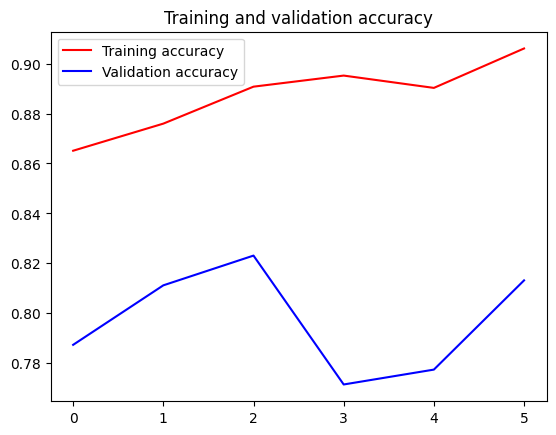

<Figure size 640x480 with 0 Axes>

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

1/1 [==============================] - 0s 50ms/step


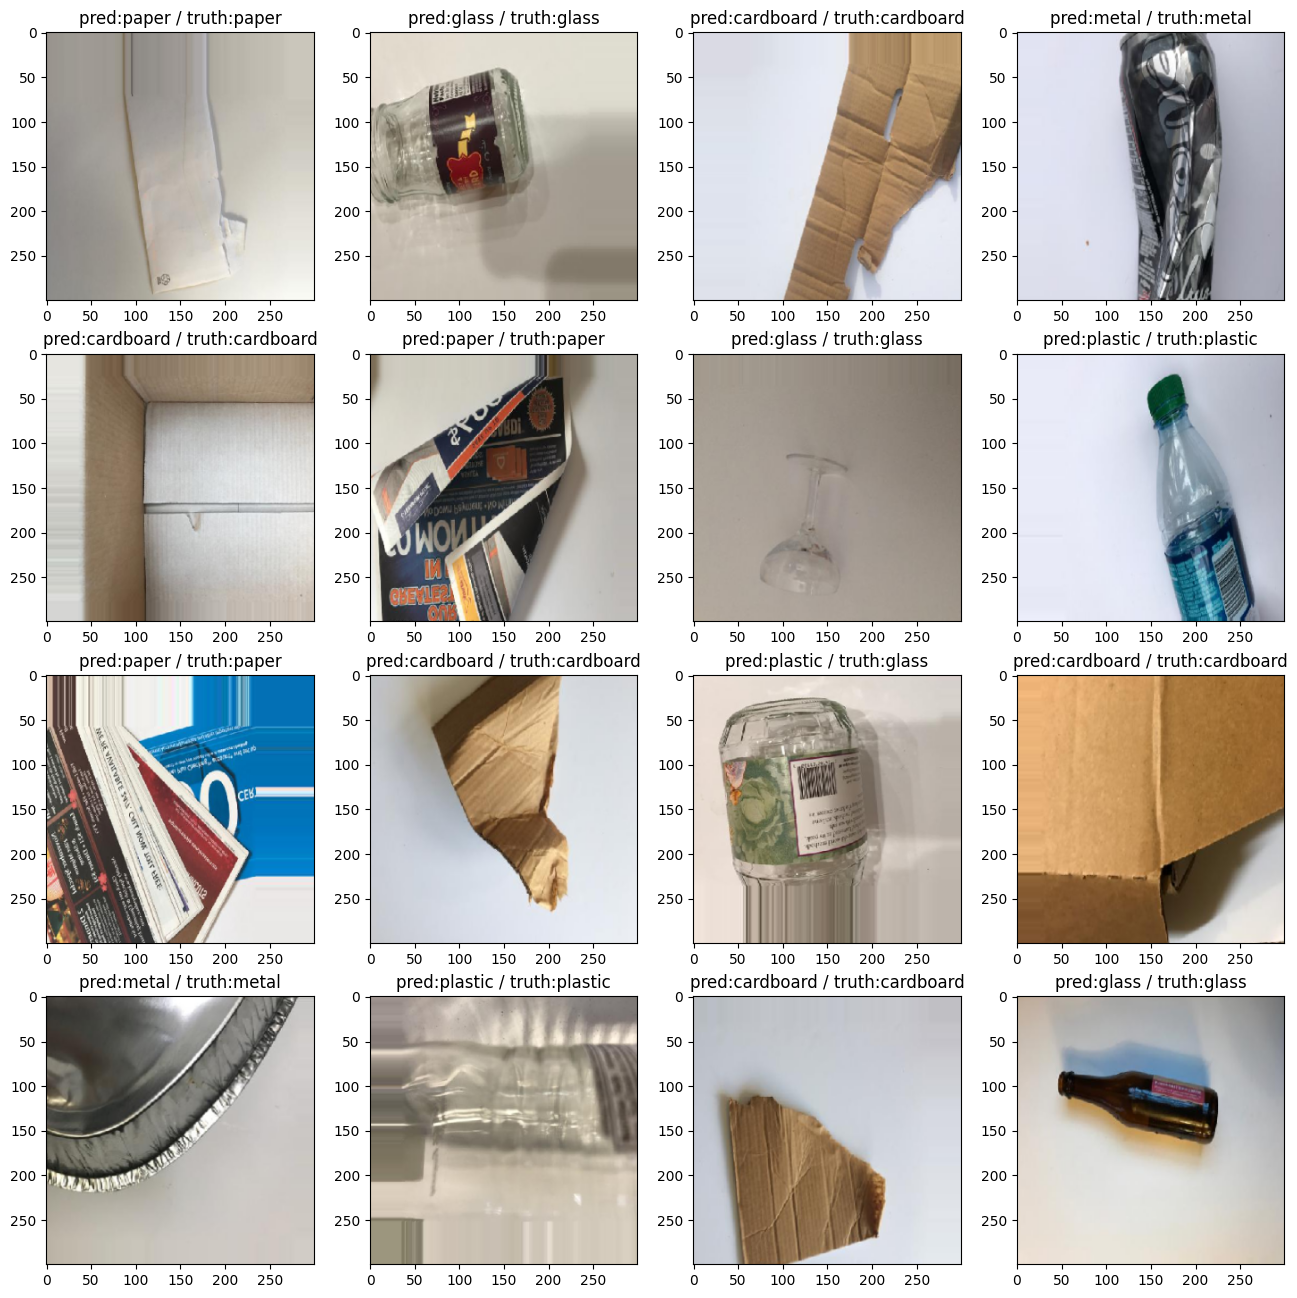

In [41]:
test_x, test_y = val_data.__getitem__(1)

preds = model.predict(test_x)

plt.figure(figsize=(16, 16))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.title('pred:%s / truth:%s' % (classes[np.argmax(preds[i])], classes[np.argmax(test_y[i])]))
    plt.imshow(test_x[i])